In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AirQuality_visualization.csv',delimiter=';')

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB
None

In [5]:
df = df.dropna(axis=1, thresh=len(df) * 0.5)

In [6]:
df = df.dropna()

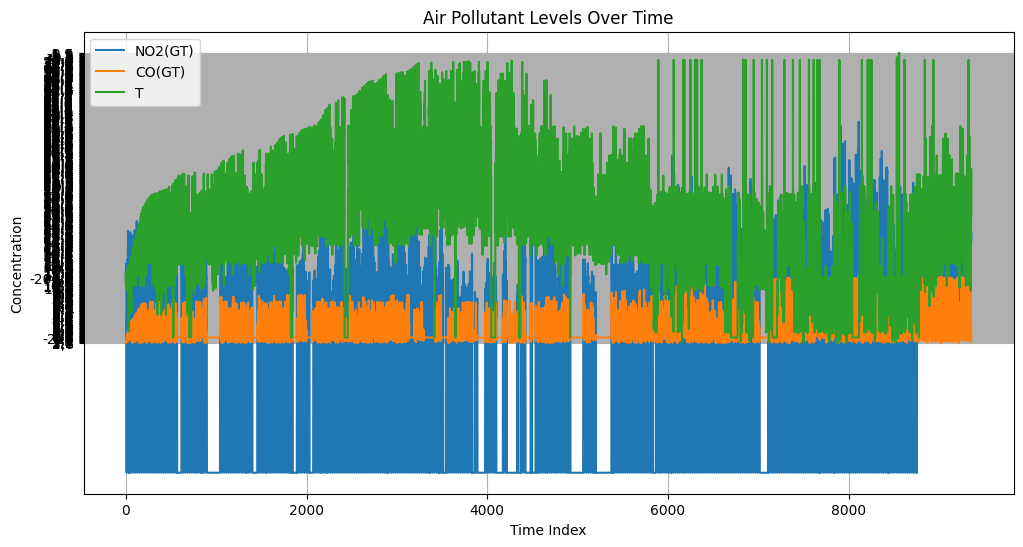

In [8]:
# Line plot for concentration of pollutants over time
plt.figure(figsize=(12, 6))
for col in ['NO2(GT)', 'CO(GT)', 'O3(GT)', 'PM10', 'T']:
    if col in df.columns:
        plt.plot(df.index, df[col], label=col)
plt.title('Air Pollutant Levels Over Time')
plt.xlabel('Time Index')
plt.ylabel('Concentration')
plt.legend()
plt.grid()
plt.show()

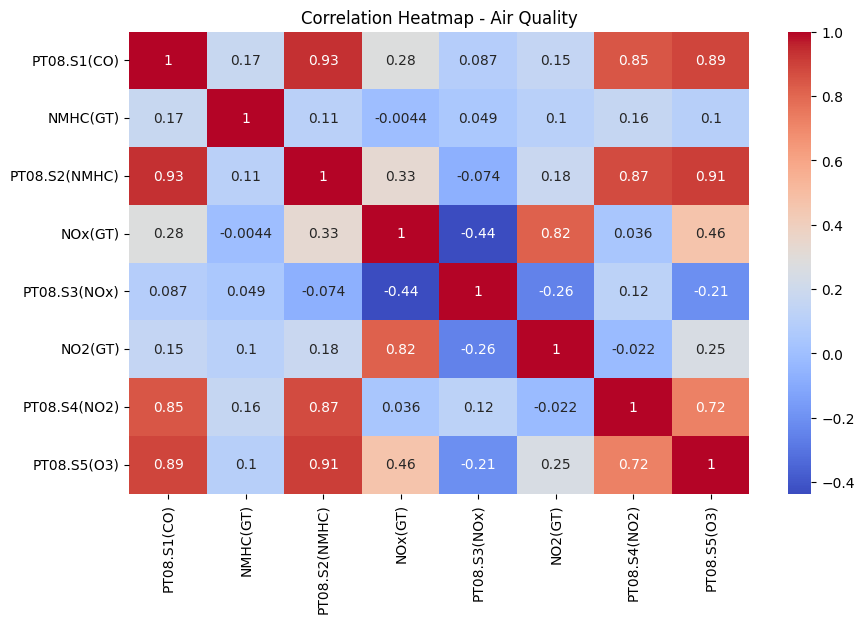

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Air Quality')
plt.show()


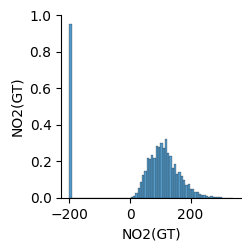

In [11]:
# Pairplot for selected pollutants
pollutants = ['NO2(GT)', 'CO(GT)', 'O3(GT)', 'PM10']
pollutants = [p for p in pollutants if p in df.columns]
sns.pairplot(df[pollutants])
plt.show()

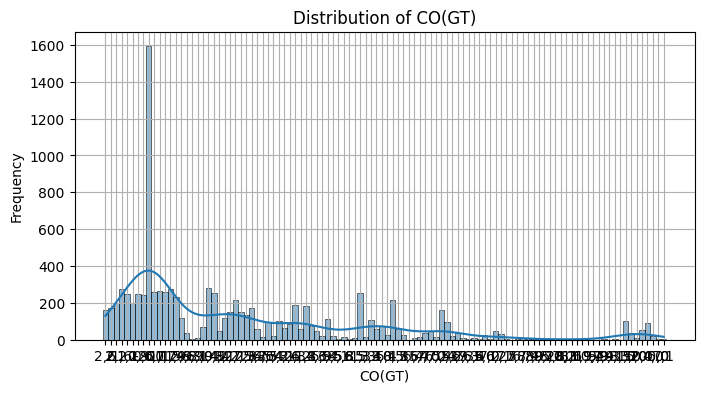

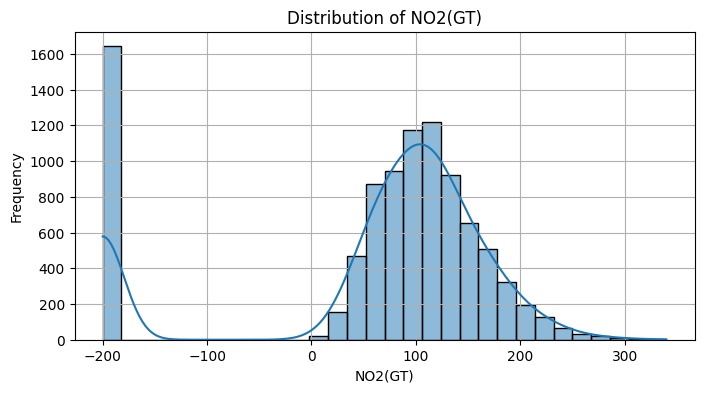

In [12]:
# Plot histograms of major pollutants
pollutants = ['CO(GT)', 'NO2(GT)', 'O3(GT)', 'PM10']
for col in pollutants:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


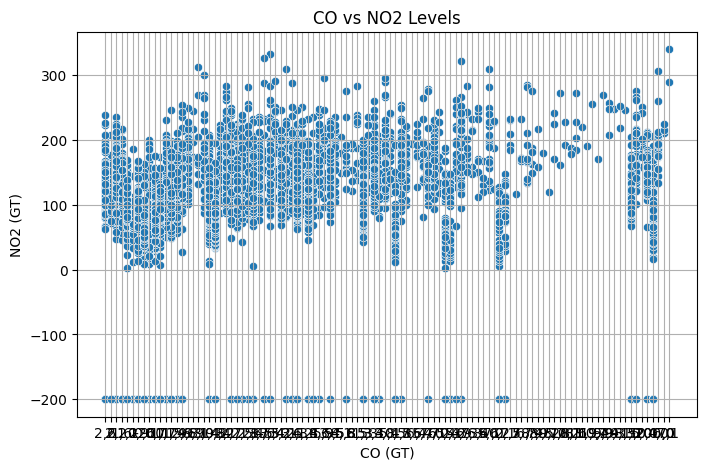

In [14]:
# Scatterplot between CO and NO2
if 'CO(GT)' in df.columns and 'NO2(GT)' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x='CO(GT)', y='NO2(GT)', data=df)
    plt.title('CO vs NO2 Levels')
    plt.xlabel('CO (GT)')
    plt.ylabel('NO2 (GT)')
    plt.grid(True)
    plt.show()


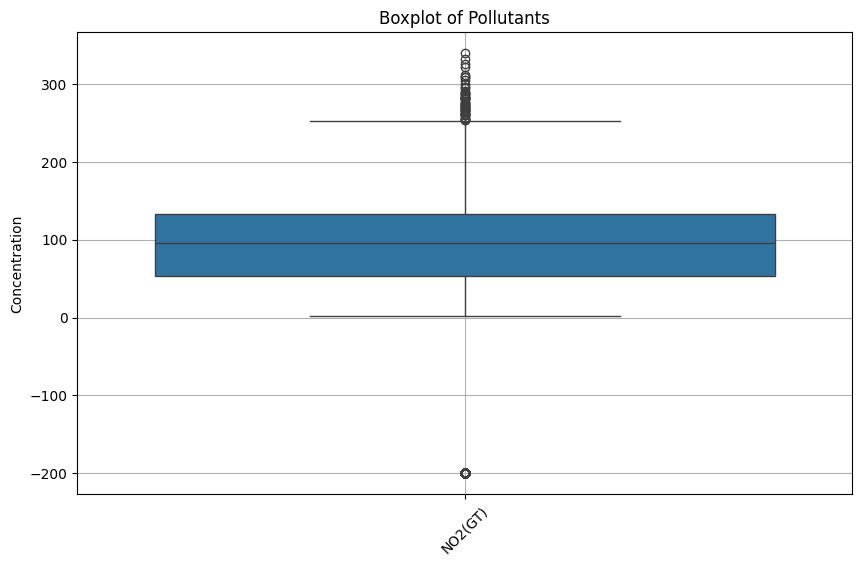

In [16]:
# Define target pollutants
all_pollutants = ['CO(GT)', 'NO2(GT)', 'O3(GT)', 'PM10', 'T']  # You can add more if needed

# Filter to only existing columns
existing_pollutants = [col for col in all_pollutants if col in df.columns]

# Plot boxplot only for existing columns
if existing_pollutants:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[existing_pollutants])
    plt.title('Boxplot of Pollutants')
    plt.ylabel('Concentration')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("None of the selected pollutant columns were found in the dataset.")


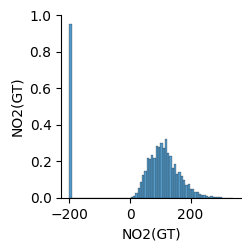

In [17]:
# Pairplot for multiple variables
selected = [col for col in ['CO(GT)', 'NO2(GT)', 'O3(GT)', 'PM10', 'T'] if col in df.columns]
sns.pairplot(df[selected])
plt.show()
